# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis
## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and amount.

## Objective
This Project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. we use python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit card versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for divers, without negatively impacting customer experience?

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset
df = pd.read_csv('/content/drive/MyDrive/new data/Taxi_Trip_Data.csv')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [ ]:
df.shape

(6500000, 18)

In [ ]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499995,2.0,2020-02-01 12:52:43,2020-02-01 13:02:11,1.0,1.21,1.0,N,238,239,1.0,7.5,0.0,0.5,2.16,0.00,0.3,14.91,2.5,9.466667
6499996,2.0,2020-02-01 12:38:19,2020-02-01 13:19:03,1.0,17.77,2.0,N,132,100,1.0,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5,40.733333
6499997,2.0,2020-02-01 12:12:39,2020-02-01 12:25:20,1.0,3.57,1.0,N,13,33,1.0,13.5,0.0,0.5,3.36,0.00,0.3,20.16,2.5,12.683333
6499998,2.0,2020-02-01 12:42:47,2020-02-01 13:09:27,1.0,5.85,1.0,N,209,230,2.0,23.5,0.0,0.5,0.00,0.00,0.3,26.80,2.5,26.666667


In [ ]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6499995,1.0,1.0,7.5,1.21,9.466667
6499996,1.0,1.0,52.0,17.77,40.733333
6499997,1.0,1.0,13.5,3.57,12.683333
6499998,1.0,2.0,23.5,5.85,26.666667


In [ ]:
df.isnull().sum()

,0
passenger_count,79229
payment_type,79229
fare_amount,0
trip_distance,0
duration,0


In [ ]:
(3495/len(df))*100

0.05376923076923077

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6499995,1.0,1.0,7.5,1.21,9.466667
6499996,1.0,1.0,52.0,17.77,40.733333
6499997,1.0,1.0,13.5,3.57,12.683333
6499998,1.0,2.0,23.5,5.85,26.666667


In [ ]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [ ]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6499992,1,1,6.5,1.18,7.050000
6499993,1,1,8.0,1.75,8.400000
6499994,1,1,8.0,1.56,8.400000
6499995,1,1,7.5,1.21,9.466667


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.581534
2,0.190399
3,0.066438
5,0.063065
6,0.039385
4,0.036121
0,0.023037
7,0.000009
9,0.000006


In [ ]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,6.779756e-01
2,3.078049e-01
3,8.742091e-03
4,5.477103e-03
5,3.293310e-07


We will focus solely on payment types 'card' and 'cash' denoted by 1 and 2 in the dataset. To ensure our analysis centers on these payment methods, we'll filter the data accordingly, excluding all other types.

Moreover, examining the didtribution of passenger count reveals that trips with more than 5 passenger are rate. Additionally, trip with 0 passengers are impossible, as we expect at least one passenger to pay the fare amount. Therfore, we will filter the passenger count to include only values ranging from 1 to 5.

In [ ]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count'] >0)&(df['passenger_count']<6)]

In [ ]:
df.shape

(2806185, 5)

In [ ]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6499987,2,Card,13.5,3.01,16.166667
6499989,4,Cash,29.5,7.00,37.116667
6499996,1,Card,52.0,17.77,40.733333
6499998,1,Cash,23.5,5.85,26.666667


In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.806185e+06,2.806185e+06,2.806185e+06,2.806185e+06
mean,1.734508e+00,1.781410e+01,4.542451e+00,2.418423e+01
std,1.177486e+00,1.506292e+01,4.893464e+00,9.291006e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.740000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.480000e+00,2.335000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [ ]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6499987,2,Card,13.5,3.01,16.166667
6499989,4,Cash,29.5,7.00,37.116667
6499996,1,Card,52.0,17.77,40.733333
6499998,1,Cash,23.5,5.85,26.666667


In [ ]:
for col in ['fare_amount','trip_distance','duration']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3 - q1

  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6499980,1,Card,8.0,1.23,9.083333
6499986,1,Card,12.0,2.74,13.900000
6499987,2,Card,13.5,3.01,16.166667
6499998,1,Cash,23.5,5.85,26.666667


we're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variation in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. this will also provide stakeholders with insight into fare amount range associated with different payment methods.

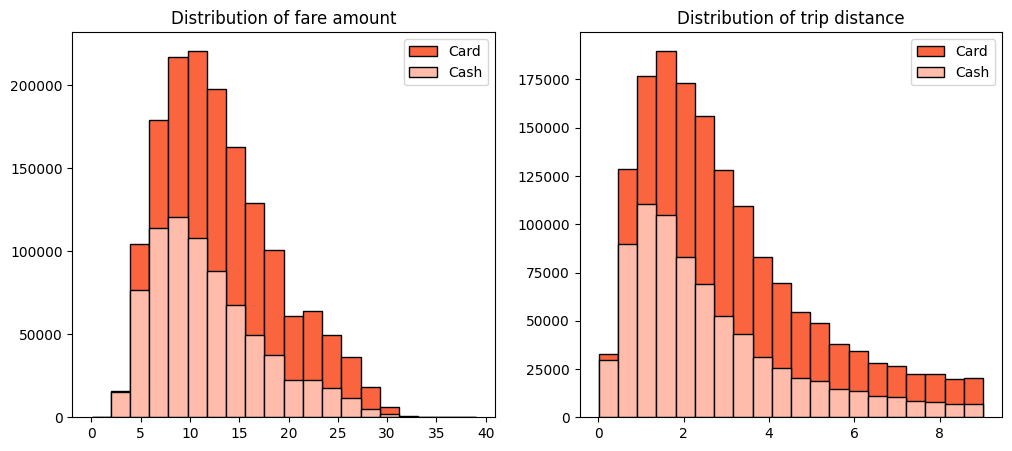

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.149007  5.879689      3.009029  2.007860
Cash           11.789805  5.642582      2.617152  1.928551

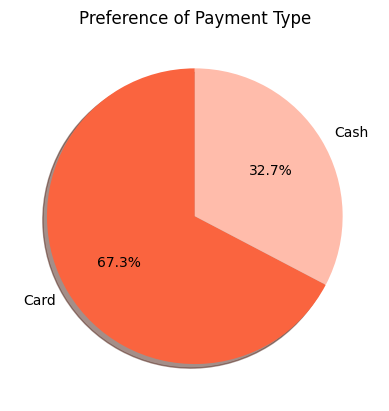

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90,shadow=True, autopct='%1.1f%%', colors = ['#FA643f','#FFBCAB'])
plt.show()

In [ ]:
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         918382
             2                         331325
             3                         123869
             4                          64511
             5                         125505
Cash         1                         465598
             2                         157111
             3                          55122
             4                          33093
             5                          48265

In [ ]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,918382,39.538037
1,Card,2,331325,14.264151
2,Card,3,123869,5.332789
3,Card,4,64511,2.777317
4,Card,5,125505,5.403221
5,Cash,1,465598,20.044851
6,Cash,2,157111,6.763918
7,Cash,3,55122,2.373104
8,Cash,4,33093,1.424715
9,Cash,5,48265,2.077897


## Hypothesis Testing
In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distributon of fare amounts adheres to a normal distribution.

Quantile-quantile(QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributd. if the data point closely align with the diagonal line in plot, it suggests that the data follows a normal distributoin.

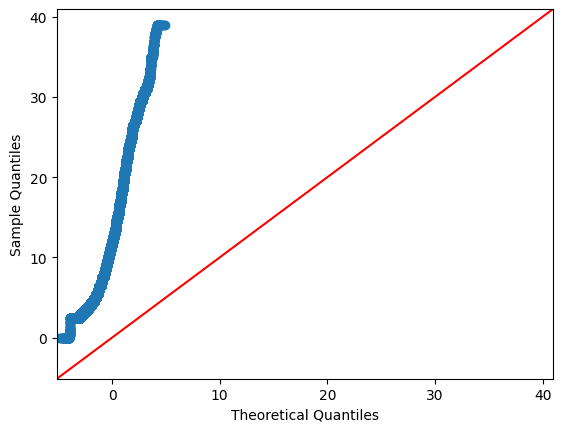

In [ ]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [ ]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [ ]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var=False)
print('T statistic', t_stats, 'p_value',p_value)

T statistic 169.83701521279352 p_value 0.0


 **Null Hypothesis:** There is no difference in average fare between customers who use cash.

**Alternative hypothesis:** There is a  difference in average fare between customers who use cash.


In [ ]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,39.538037,14.264151,5.332789,2.777317,5.403221
1,Cash,20.044851,6.763918,2.373104,1.424715,2.077897


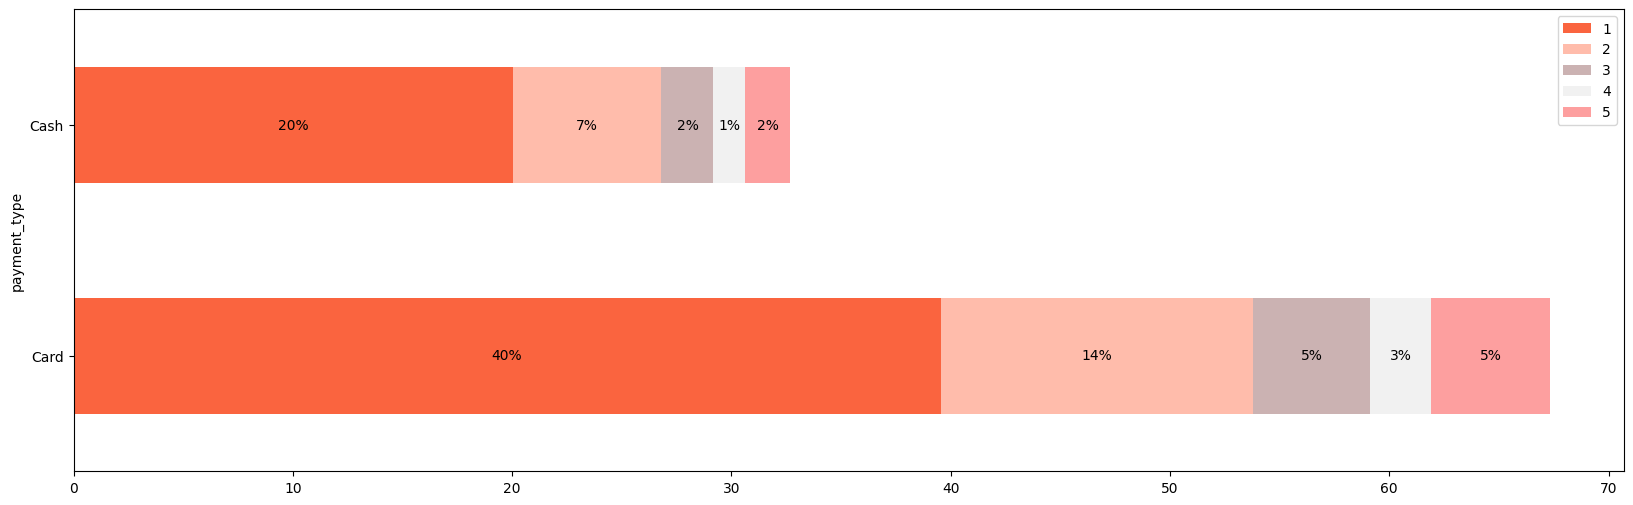

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, ax=ax,
        color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')
